# Identification des motifs d'hospitalisation fréquents

## tf-idf (Term Frequency - Inverse Document Frequency)

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv("../data/parcours_soins.csv")

/tmp/ipykernel_514/1245939646.py:1: DtypeWarning: Columns (4,7,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,2

In [3]:
data

,BEN_NIR_IDT,2008-01-15,2008-02-15,2008-03-15,2008-04-15,2008-05-15,2008-06-15,2008-07-15,2008-08-15,2008-09-15,...,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29
0,P0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,P24302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10047,P24303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10048,P24304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10049,P24308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.iloc[0].dropna().tolist()

['P0',
 '05K051',
 '05M042',
 '05M16T',
 '05M09T',
 '05M092',
 '05C191',
 '05M20Z',
 '05M20Z',
 '05C191']

In [5]:
vectorizer = TfidfVectorizer(use_idf=True)

In [6]:
corpus=[]
for patient in tqdm(range(len(data))):   
    p_soins=data.iloc[patient].dropna().tolist()[1:]
    corpus.append(" ".join(p_soins))

100%|██████████| 10051/10051 [00:05<00:00, 1841.26it/s]


In [7]:
corpus[:10]

['05K051 05M042 05M16T 05M09T 05M092 05C191 05M20Z 05M20Z 05C191',
 '02C05J 02C05J 05M093 04M132 05C222 23M103 04M053 04M24E',
 '11M041 06C194',
 '05M04T 05K051',
 '08C11V 23M15Z 05K102 05M08T 05K102 05C191 23M101 05K191 06K02Z',
 '24M35Z 05K062 05M131 11M042 01C061 01C061 06M12T 05K061 05K102 16M111 19M072 13C171 08M372 08M373 01C15J 01C15J 11M043 06M032 16M112 05M093 04M143 11M044 04M053 09M063 05K251 09M062 09M063 05K062 09M064 05M094 05M093 05M094 05M22E',
 '08M36T 08M101 04M052 05M171 08M102 11M043 05K102 05C103',
 '05K061 02M09Z 05K10J 02M071 01C14J 09M052 09M052 05M12T 05K061 10M021 08C521',
 '24C18Z 05K202 05K101 23K02Z 05M08T 05M082 05M08T 05K191 05K191',
 '01M201 05M13T 05K061 05M13T 05M171 05M091 05M171 05M13T 05M13T 05M13T 05K061 05M13T 05M13T 05M13T 05K241 05M13T 05K06T 05M23T 16M103 06M133']

In [8]:
X = vectorizer.fit_transform(corpus)

In [9]:
X

<10051x2346 sparse matrix of type '<class 'numpy.float64'>'
	with 69894 stored elements in Compressed Sparse Row format>

In [10]:
df = pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df.head()

,TF-IDF
05c191,0.570256
05m20z,0.549135
05m16t,0.381044
05k051,0.304123
05m042,0.278157


In [11]:
tfidf=[]

#pour chaque patient, on extrait le GHM de son parcours de soins qui est le plus "pertinent", càd ayant le plus grand tf-idf
for patient in tqdm(range(len(data))):
    df = pd.DataFrame(X[patient].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF', ascending=False)
    tfidf.append(df.iloc[0].name)

100%|██████████| 10051/10051 [00:20<00:00, 490.15it/s]


In [12]:
def count_to_dict(liste):
    return {k:liste.count(k) for k in liste}

In [13]:
dic=count_to_dict(tfidf)

In [15]:
dico={'ghm': list(dic.keys()), 'freq': list(dic.values())}

### Liste des GHM les plus pertinents dans le dataset, avec leurs fréquences associées

In [16]:
ghm_pertinents=pd.DataFrame(dico).sort_values(by="freq", ascending=False).head(20).reset_index(drop=True)

In [17]:
ghm_pertinents['code']=ghm_pertinents['ghm'].str[:2].astype(int)

In [18]:
cmd_ghm=pd.read_csv("../data/CMD_GHM.csv", index_col=0)

In [19]:
cmd_ghm.head()

,CMD
Code,
1,Affections du système nerveux
2,Affections de l'œil
3,"Affections des oreilles, du nez, de la gorge, ..."
4,Affections de l'appareil respiratoire
5,Affections de l'appareil circulatoire


In [20]:
L_CMD=[]
for code in ghm_pertinents['code']:
    L_CMD.append(cmd_ghm.loc[code, 'CMD'])
ghm_pertinents['cmd']=L_CMD

In [21]:
ghm_pertinents

,ghm,freq,code,cmd
0,05m092,138,5,Affections de l'appareil circulatoire
1,05m093,117,5,Affections de l'appareil circulatoire
2,02c05j,107,2,Affections de l'œil
3,02c051,106,2,Affections de l'œil
4,05m091,79,5,Affections de l'appareil circulatoire
5,04m053,66,4,Affections de l'appareil respiratoire
6,05m09t,61,5,Affections de l'appareil circulatoire
7,23k02z,55,23,Facteurs influant sur l'état de santé et autre...
8,23z02z,55,23,Facteurs influant sur l'état de santé et autre...
9,04m202,52,4,Affections de l'appareil respiratoire


<AxesSubplot: xlabel='ghm'>

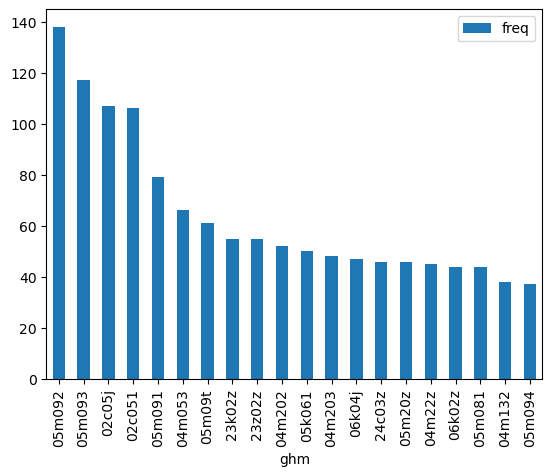

In [22]:
pd.DataFrame(dico).sort_values(by="freq", ascending=False).head(20).plot.bar(x="ghm", y="freq")